### 한글 워드클라우드
- 한빛 아카데미 > 새로나온 책의 TAG 정보

1. 크롤링

In [1]:
import requests
from urllib.parse import quote
import pandas as pd
from bs4 import BeautifulSoup

In [3]:
from tqdm import tqdm
base_url = 'https://www.hanbit.co.kr'
main_url = '/academy/books/new_book_list.html'

lines = []
for page in tqdm(range(1, 24)):               # 총 페이지가 23 페이지
    url = f'{base_url}{main_url}?page={page}'
    result = requests.get(url)
    soup = BeautifulSoup(result.text)
    lis = soup.select('li.sub_book_list')
    for li in lis:
        href = li.select_one('.pop_quick_bg')['onclick'][10:-1]
        res = requests.get(base_url + href)
        book_soup = BeautifulSoup(res.text)
        tags = book_soup.select('.tag_area > a')
        for a in tags:
            lines.append(a.get_text().strip())        

100%|██████████| 23/23 [02:55<00:00,  7.65s/it]


In [23]:
pd.Series(lines).value_counts().head(10)

무역경영사     59
파이썬       26
프로그래밍     22
미분적분학     19
통계        19
OA        18
office    17
인공지능      16
oa        16
엑셀        14
dtype: int64

2. 워드 클라우드 만들기

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

- 태그 리스트(lines)를 frequency dict.로 만들기

In [24]:
tag_set = set(lines)
len(tag_set)

1425

In [25]:
tag_dict = {item : lines.count(item) for item in tag_set}
# tag_dict = {}
# for item in tag_set:
#       tag_dict[item] = lines.count(item)

In [27]:
count = 0
for key, val in tag_dict.items():
    print(key, ':', val)
    count += 1
    if count > 5:
        break

 : 1
java : 2
전기기기 : 1
MATLAB : 9
기초 통계학 : 3
python : 5


- 워드 클라우드

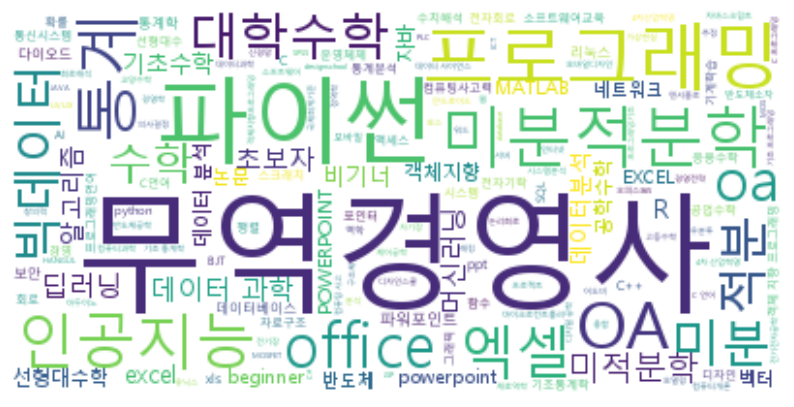

In [33]:
wc = WordCloud(
        background_color='white', random_state=2023,
        font_path=('c:/Windows/Fonts/malgun.ttf')
    ).generate_from_frequencies(tag_dict)
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

- 태그 단어를 펼처서 문자열로 만든 후 워드 클라우드 만들기

In [34]:
tag_text = ' '.join(lines)
print(tag_text[:100])

매트랩 MATLAB 매트랩 프로그래밍 의학통계 논문 통계 분석 데이터분석 jamovi 메타분석 패널데이터 의사 의학 보건 정보 교육 교과교육론 정보교과교육 SW교육 IT교육 회로 


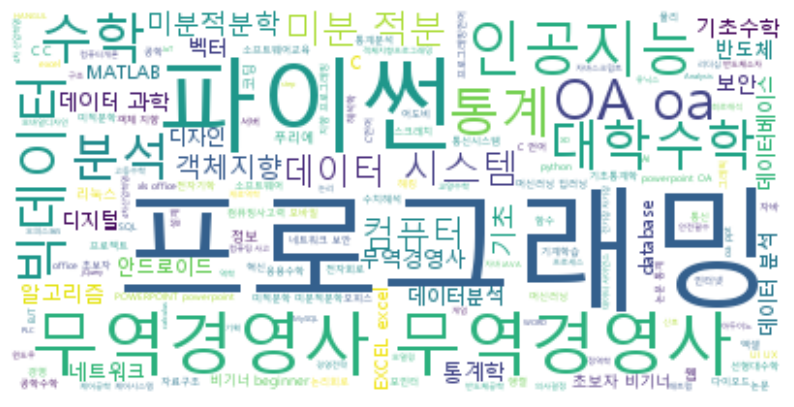

In [37]:
wc = WordCloud(
        background_color='white', random_state=2023,
        font_path=('c:/Windows/Fonts/malgun.ttf')
    ).generate(tag_text)
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off');